## Run MACMODS on dummy data

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from magpy.mag_species import Macrocystis as MacroAlgaeParameters
from magpy.mag0 import MAG0,build_run_params


%matplotlib inline
%config InlineBackend.figure_format = 'retina'


mag_calc_fortran not imported/available!


### Function: 
### 1. create dummy data
### 2. make plots of the MACMODS results

In [2]:
def create_forcing_data(sst_trend_K_per_year=0):
    # Define time range with 8-day intervals
    time_index = pd.date_range(start="2022-12-31", end="2050-01-01", freq="8D")

    # Generate synthetic forcing data (random but reasonable values)



    # sst
    min_temp = 5  # Minimum temperature in January (°C)
    max_temp = 20  # Maximum temperature in July (°C)
    annual_cycle = 365  # Approximate number of days in a year

    # Generate the sinusoidal pattern
    days_in_year = (time_index - time_index[0]).days % annual_cycle


    sst = min_temp + (max_temp - min_temp) / 2 * (1 + np.sin(2 * np.pi * days_in_year / annual_cycle))
    trend = sst_trend_K_per_year * (time_index.year - time_index.year.min())  # 1°C increase per year
    sst += trend


    min_par=10
    max_par=20
    par = min_par + (max_par - min_par) / 2 * (1 + np.sin(2 * np.pi * days_in_year / annual_cycle))

    # Generate sinusoidal Nutrient concentration (NO3) with a cycle
    min_no3 = 1  # Minimum nitrate concentration in September (µM)
    max_no3 = 30  # Maximum nitrate concentration in March (µM)
    shift_march = 90  # Days offset for maximum to occur around March

    # Generate the sinusoidal NO3 pattern with peak in March
    no3 = min_no3 + (max_no3 - min_no3) / 2 * (1 + np.sin(2 * np.pi * (days_in_year - shift_march) / annual_cycle))




    forcing_data = pd.DataFrame({
        "sst": sst,     # Sea Surface Temp (°C)
        "par": par,     # PAR (µmol photons m⁻² s⁻¹)
        "chl": np.random.uniform(0.1, 5.0, size=len(time_index)),   # Chlorophyll (mg m⁻³)
        "swh": np.random.uniform(0.5, 3.0, size=len(time_index)),   # Significant Wave Height (m)
        "mwp": np.random.uniform(3, 12, size=len(time_index)),      # Mean Wave Period (s)
        "cmag": np.random.uniform(0.05, 1.5, size=len(time_index)), # Current Magnitude (m/s)
        "no3": no3,      # Nitrate concentration (µM)
        "nflux": np.random.uniform(-2, 2, size=len(time_index)),    # Nutrient flux (µM/day)
    }, index=time_index)

    # Add a constant column for "seed"
    forcing_data["seed"] = 42  # Example constant value
    forcing_data["ylat"] = 40
    forcing_data["xlon360"] = 40

    # Set the index name to indicate it's time-based
    forcing_data.index.name = "time"
    return forcing_data

def plot_macmods(macmods_res,start_date=None,end_date=None):
    
    if start_date:
        macmods_res = macmods_res[start_date:]
        
    if end_date:
        macmods_res = macmods_res[:end_date]
    
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 5))  
    axes = axes.ravel() 

    macmods_res["sst"].plot(ax=axes[0])  
    axes[0].set_title('SST [°C]')
    axes[0].grid(True)

    macmods_res["par"].plot(ax=axes[1])  
    axes[1].set_title('PAR [mol photons m² s]')
    axes[1].grid(True)

    macmods_res["no3"].plot(ax=axes[2])  
    axes[2].set_title('NO3 [Nitrate concentration (µM)]')
    axes[2].grid(True)

    macmods_res["swh"].plot(ax=axes[3])  
    axes[3].set_title('Significant wave height [m]')
    axes[3].grid(True)

    macmods_res["mwp"].plot(ax=axes[4])  
    axes[4].set_title('Mean wave period [s]')
    axes[4].grid(True)


    macmods_res["cmag"].plot(ax=axes[5])  
    axes[5].set_title('Ocean current [m/s]')
    axes[5].grid(True)
    
    fig.suptitle('Forcing data')
    plt.tight_layout()

    plt.show()
    
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

    macmods_res['B'].plot(ax=axes[0]) 
    axes[0].set_title("sea weed biomass [g DW / m2]")
    axes[0].grid(True)


    macmods_res["Q"].plot(ax=axes[1])  
    axes[1].set_title('Nutrient Status [mg N / g DW]')
    axes[1].grid(True)

    macmods_res['d_Bm'].plot(ax=axes[2])  
    axes[2].set_title('Biomass death [g DW / m2]')
    axes[2].grid(True)

    fig.suptitle('MACOMODS Results')
    plt.tight_layout()

    plt.show()
    

## Set parameters and run the MACMODS

In [3]:
# set macroalgage parameters
parameters=MacroAlgaeParameters
parameters['start_year']=2023
parameters['start_month']=1
parameters['output_path']='/Users/ksuselj/Downloads/macmods/'
parameters['code_path']='/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/'
parameters['seeding_type']=0
parameters['calc_steps']=365*10

# apparently this is no harvesting
parameters['mp_harvest_schedule'] = 1
parameters['mp_harvest_type'] = 1
parameters['mp_harvest_freq'] = 365*100
parameters['mp_harvest_span'] =  1

# N concentration limitation
parameters['mp_N_flux_limit']=0

parameters=build_run_params(parameters)

display(parameters)

{'run_name': 'test0',
 'output_path': '/Users/ksuselj/Downloads/macmods/',
 'fortran_calc': False,
 'reduced_output': False,
 'monte_carlo_output': False,
 'start_year': 2023,
 'start_month': 1,
 'start_day': 1,
 'repeat_annual_forcing': False,
 'calc_steps': 3650,
 'spinup_steps': 0,
 'mp_dt_mag': 1.0,
 'code_path': '/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/',
 'matlab_grid_filepath': 'X:\\data\\CWM\\grid\\cwm_grid.mat',
 'default_cwm_mask': 'X:/data/CWM/scripts/python/mask_cbpm_2021_01_13.txt',
 'default_cwm_grid_area': 'X:\\data\\CWM\\grid\\area_twelfth_degree.txt',
 'datetime_in_output': True,
 'seeding_type': 0,
 'suppress_calc_print': False,
 'B_freq': 8,
 'Q_freq': 8,
 'Gave_freq': 8,
 'Dave_freq': 8,
 'd_B_freq': 8,
 'd_Q_freq': 8,
 'Growth2_freq': 8,
 'd_Be_freq': 8,
 'd_Bm_freq': 8,
 'd_Ns_freq': 8,
 'harv_freq': 0,
 'GRate_freq': 1,
 'B_N_freq': 8,
 'n_harv_freq': 8,
 'min_lim_freq': -1,
 'gQ_freq': -1,
 'gT_freq': -1,
 'gE_freq': -1,
 'gH_fre

In [4]:
# run macmods
forcing_data_const_sst=create_forcing_data()
macmods_cons_sst = MAG0(parameters,forcing_data_const_sst).compute()

forcing_data_dsst=create_forcing_data(1)
macmods_dsst = MAG0(parameters,forcing_data_dsst).compute()


Creating timing...
mp_spp_Vmax
mp_spp_Ks_NO3
mp_spp_kcap
mp_spp_Gmax_cap
mp_spp_PARs
mp_spp_PARc
mp_spp_Q0
mp_spp_Qmin
mp_spp_Qmax
mp_spp_BtoSA
mp_spp_line_sep
mp_spp_kcap_rate
mp_spp_Topt1
mp_spp_K1
mp_spp_Topt2
mp_spp_K2
mp_spp_CD
mp_spp_dry_sa
mp_spp_dry_wet
mp_spp_E
mp_spp_seed
mp_spp_death
mp_harvest_type
mp_harvest_schedule
mp_harvest_avg_period
mp_harvest_kg
mp_harvest_f
mp_harvest_nmax
mp_breakage_type
mp_dte
mp_dt_mag
mp_N_flux_limit
mp_farm_depth
mp_wave_mort_factor
  Allocating B
  Allocating Q
  Allocating Gave
  Allocating Dave
  Allocating d_B 8
  Allocating d_Q 8
  Allocating Growth2 8
  Allocating d_Be 8
  Allocating d_Bm 8
  Allocating d_Ns 8
  Allocating harv 0
  Allocating GRate 1
  Allocating B_N 8
  Allocating n_harv 8
  Allocating min_lim -1
  Allocating gQ -1
  Allocating gT -1
  Allocating gE -1
  Allocating gH -1
Creating & opening output files...
Calc step  0 ...
  forcing load time ... 5.7220458984375e-05


/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:703: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.f0[i][...] = self.finterp[v][nstep]
/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:704: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.ylat[...] = self.finterp['ylat'][nstep]
/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:705: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

  calc time ... 1.3643813133239746
Calc step  1 ...
  forcing load time ... 0.00019097328186035156
  calc time ... 1.1682510375976562e-05
Calc step  2 ...
  forcing load time ... 6.723403930664062e-05
  calc time ... 7.867813110351562e-06
Calc step  3 ...
  forcing load time ... 6.508827209472656e-05
  calc time ... 5.0067901611328125e-06
Calc step  4 ...
  forcing load time ... 5.1975250244140625e-05
  calc time ... 5.9604644775390625e-06
Calc step  5 ...
  forcing load time ... 5.078315734863281e-05
  calc time ... 4.76837158203125e-06
Calc step  6 ...
  forcing load time ... 6.198883056640625e-05
  calc time ... 4.76837158203125e-06
Calc step  7 ...
  forcing load time ... 4.982948303222656e-05
  calc time ... 4.76837158203125e-06
Calc step  8 ...
  forcing load time ... 4.982948303222656e-05
  calc time ... 5.0067901611328125e-06
Calc step  9 ...
  forcing load time ... 5.1021575927734375e-05
  calc time ... 5.0067901611328125e-06
Calc step  10 ...
  forcing load time ... 5.1259994

/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:703: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.f0[i][...] = self.finterp[v][nstep]
/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:704: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.ylat[...] = self.finterp['ylat'][nstep]
/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:705: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

  forcing load time ... 0.0007920265197753906
  calc time ... 4.76837158203125e-06
Calc step  2202 ...
  forcing load time ... 5.5789947509765625e-05
  calc time ... 4.76837158203125e-06
Calc step  2203 ...
  forcing load time ... 5.412101745605469e-05
  calc time ... 5.245208740234375e-06
Calc step  2204 ...
  forcing load time ... 5.3882598876953125e-05
  calc time ... 5.0067901611328125e-06
Calc step  2205 ...
  forcing load time ... 5.91278076171875e-05
  calc time ... 5.0067901611328125e-06
Calc step  2206 ...
  forcing load time ... 5.412101745605469e-05
  calc time ... 5.245208740234375e-06
Calc step  2207 ...
  forcing load time ... 5.3882598876953125e-05
  calc time ... 4.76837158203125e-06
Calc step  2208 ...
  forcing load time ... 5.507469177246094e-05
  calc time ... 5.245208740234375e-06
Calc step  2209 ...
  forcing load time ... 5.3882598876953125e-05
  calc time ... 5.245208740234375e-06
Calc step  2210 ...
  forcing load time ... 5.412101745605469e-05
  calc time ... 

/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:473: SerializationWarning: saving variable n_harv with floating point data as an integer dtype without any _FillValue to use for NaNs
  return self.close_write()
/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:703: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.f0[i][...] = self.finterp[v][nstep]
/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:704: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.ylat[...] = self.finterp['ylat'][nstep]
/Users/ksuselj/Desktop/Projects

Creating & opening output files...
Calc step  0 ...
  forcing load time ... 5.125999450683594e-05
  calc time ... 1.5020370483398438e-05
Calc step  1 ...
  forcing load time ... 5.1021575927734375e-05
  calc time ... 6.9141387939453125e-06
Calc step  2 ...
  forcing load time ... 4.792213439941406e-05
  calc time ... 5.9604644775390625e-06
Calc step  3 ...
  forcing load time ... 4.8160552978515625e-05
  calc time ... 4.76837158203125e-06
Calc step  4 ...
  forcing load time ... 4.76837158203125e-05
  calc time ... 4.0531158447265625e-06
Calc step  5 ...
  forcing load time ... 4.8160552978515625e-05
  calc time ... 4.76837158203125e-06
Calc step  6 ...
  forcing load time ... 4.8160552978515625e-05
  calc time ... 4.76837158203125e-06
Calc step  7 ...
  forcing load time ... 4.792213439941406e-05
  calc time ... 5.0067901611328125e-06
Calc step  8 ...
  forcing load time ... 4.792213439941406e-05
  calc time ... 5.245208740234375e-06
Calc step  9 ...
  forcing load time ... 4.79221343

/Users/ksuselj/Desktop/Projects/macro_algae_aist/macmods/G-MACMODS/magpy/mag0.py:473: SerializationWarning: saving variable n_harv with floating point data as an integer dtype without any _FillValue to use for NaNs
  return self.close_write()


## Results for constant SST

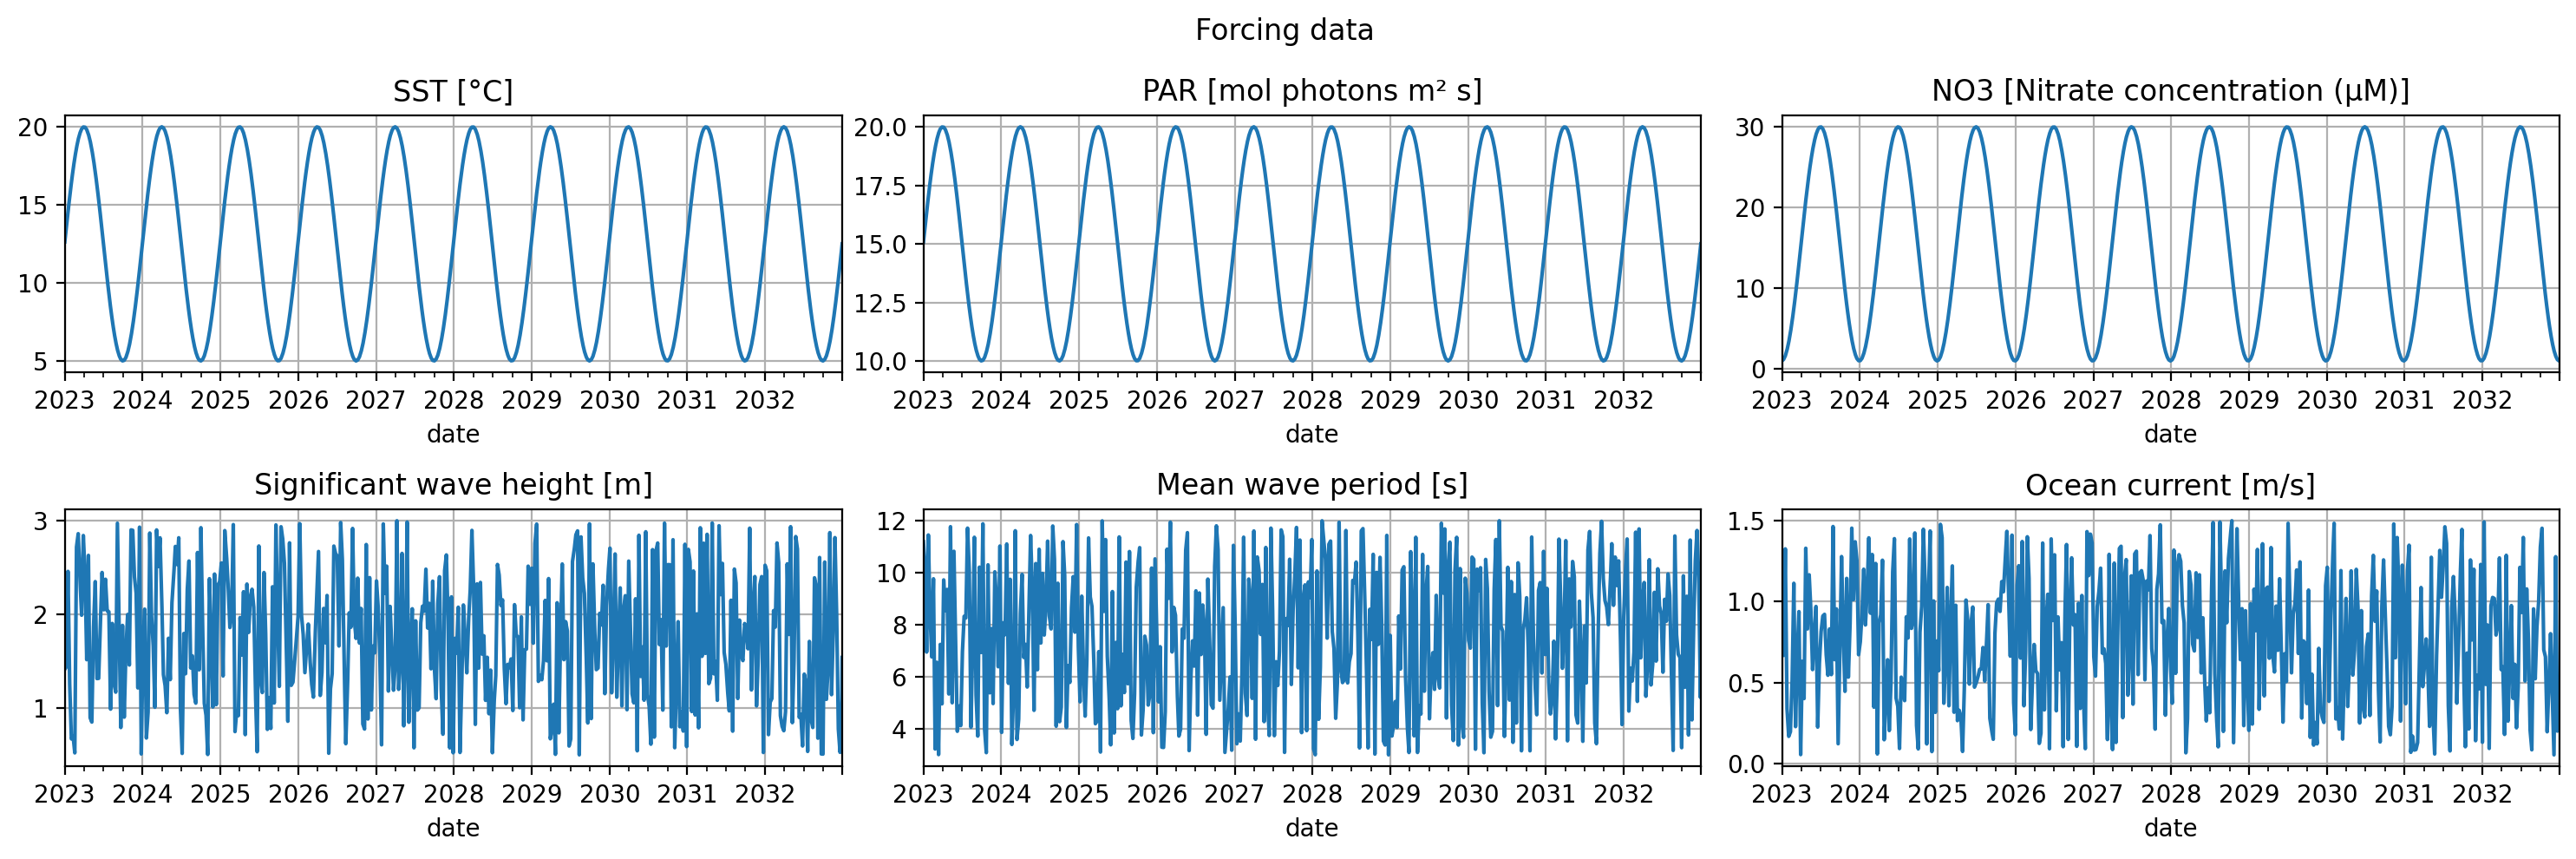

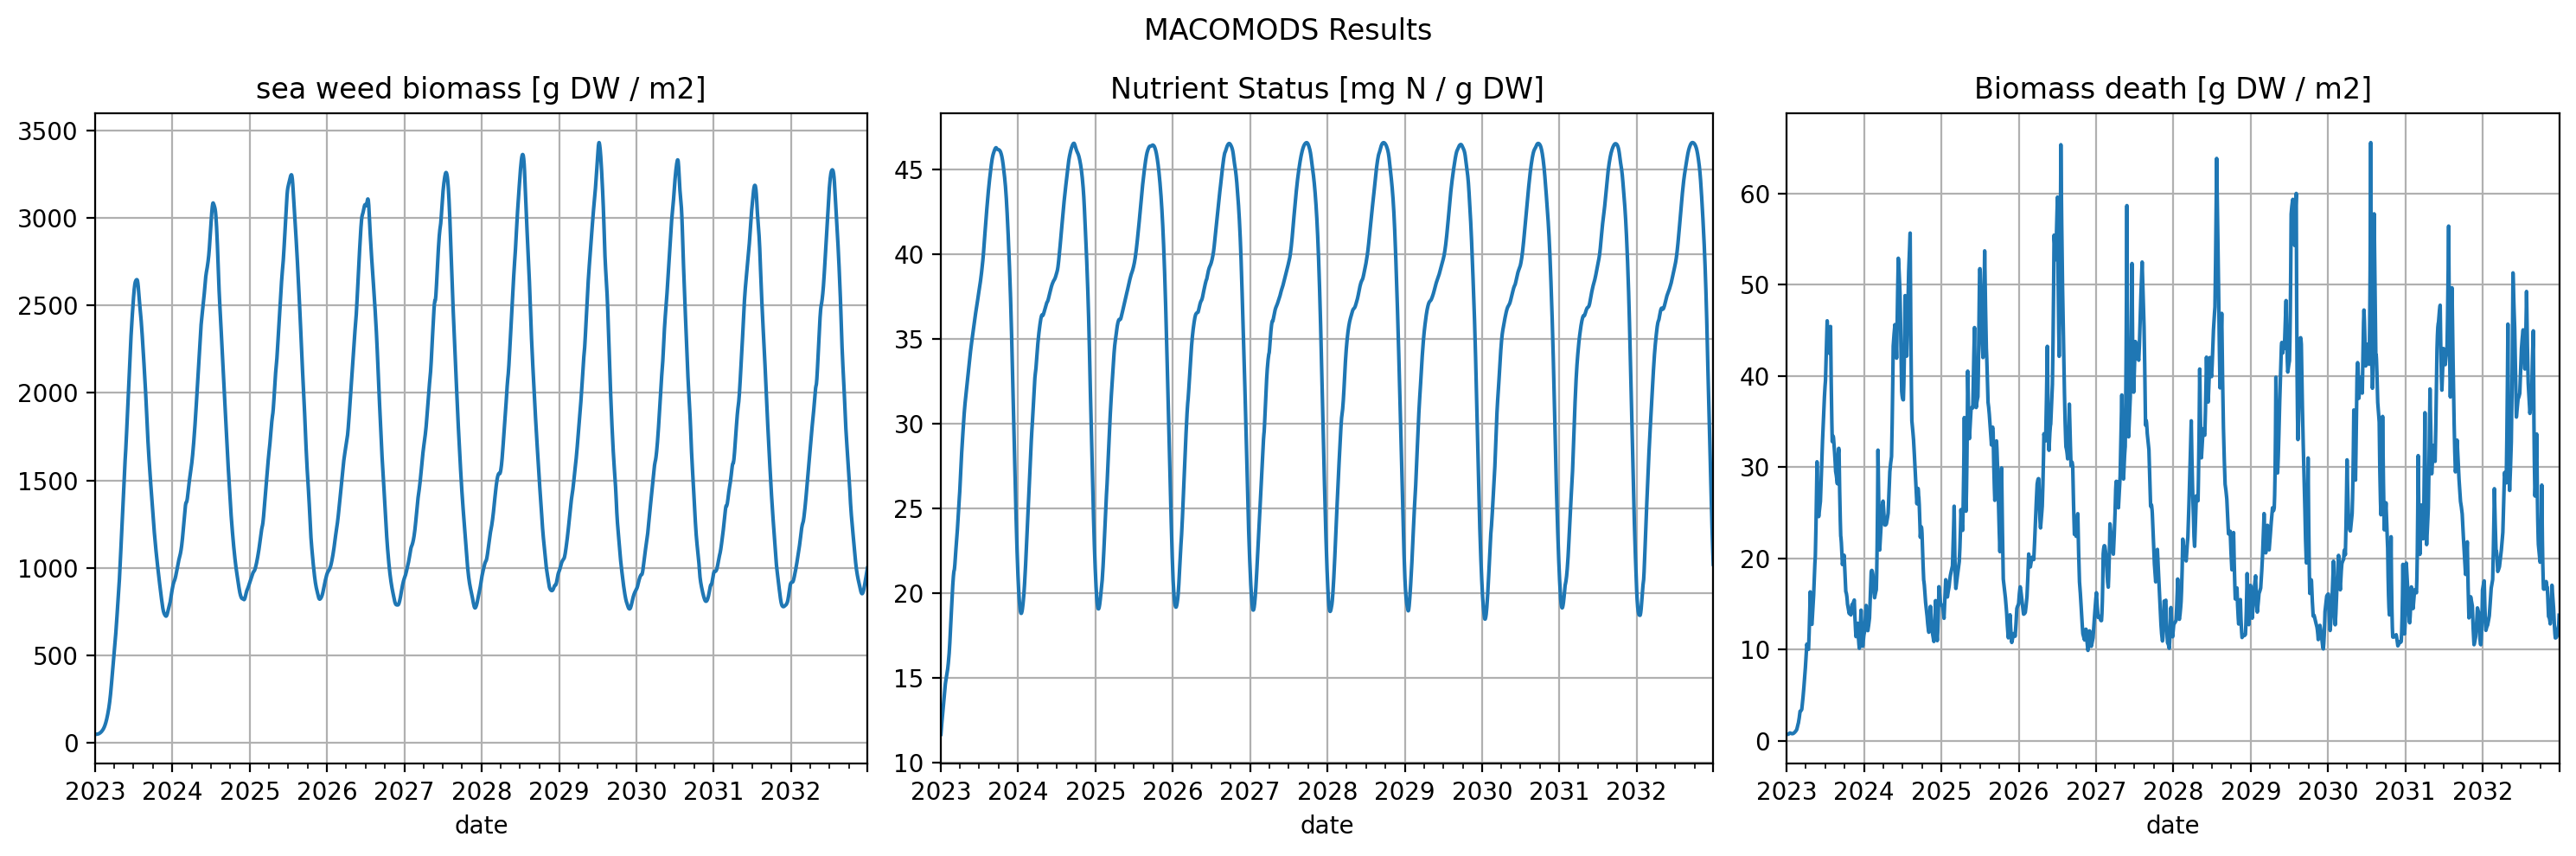

In [5]:
plot_macmods(macmods_cons_sst)

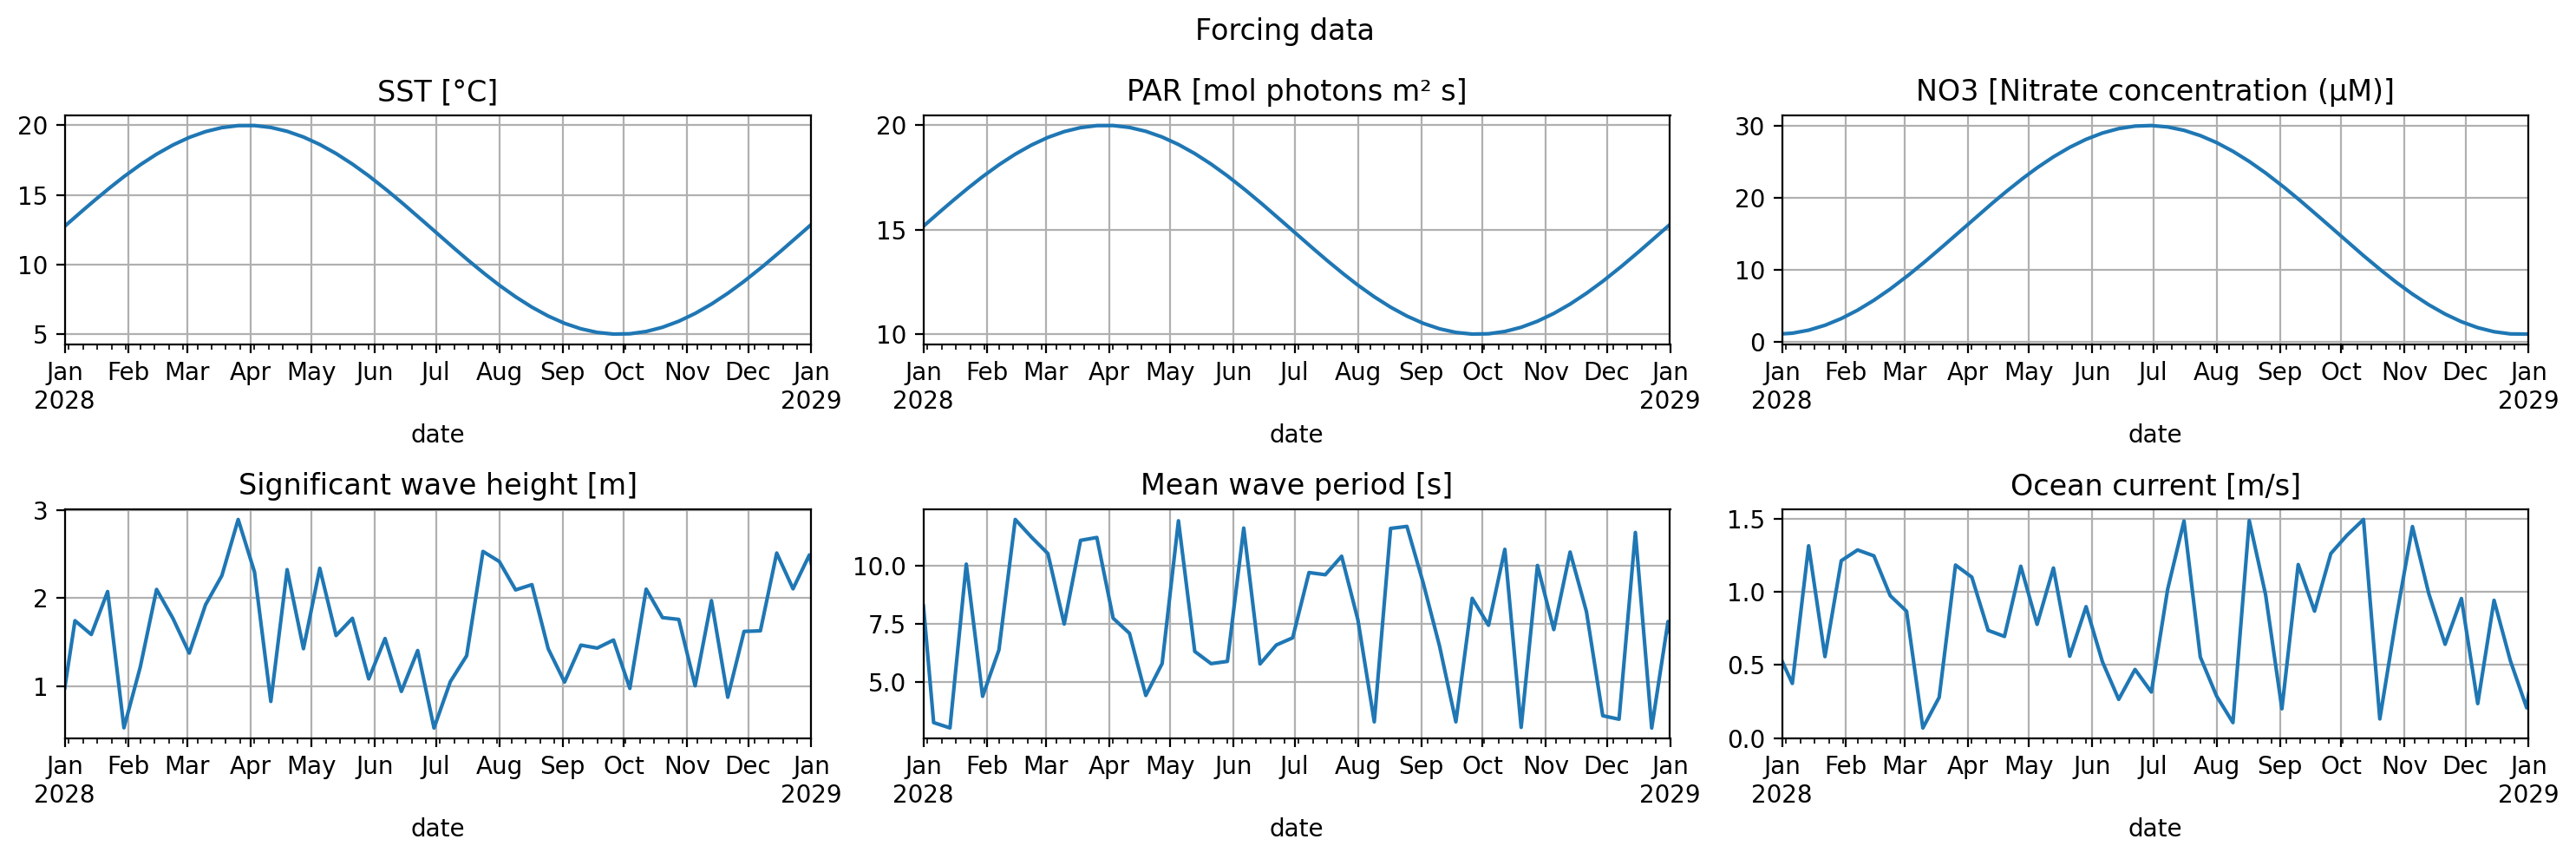

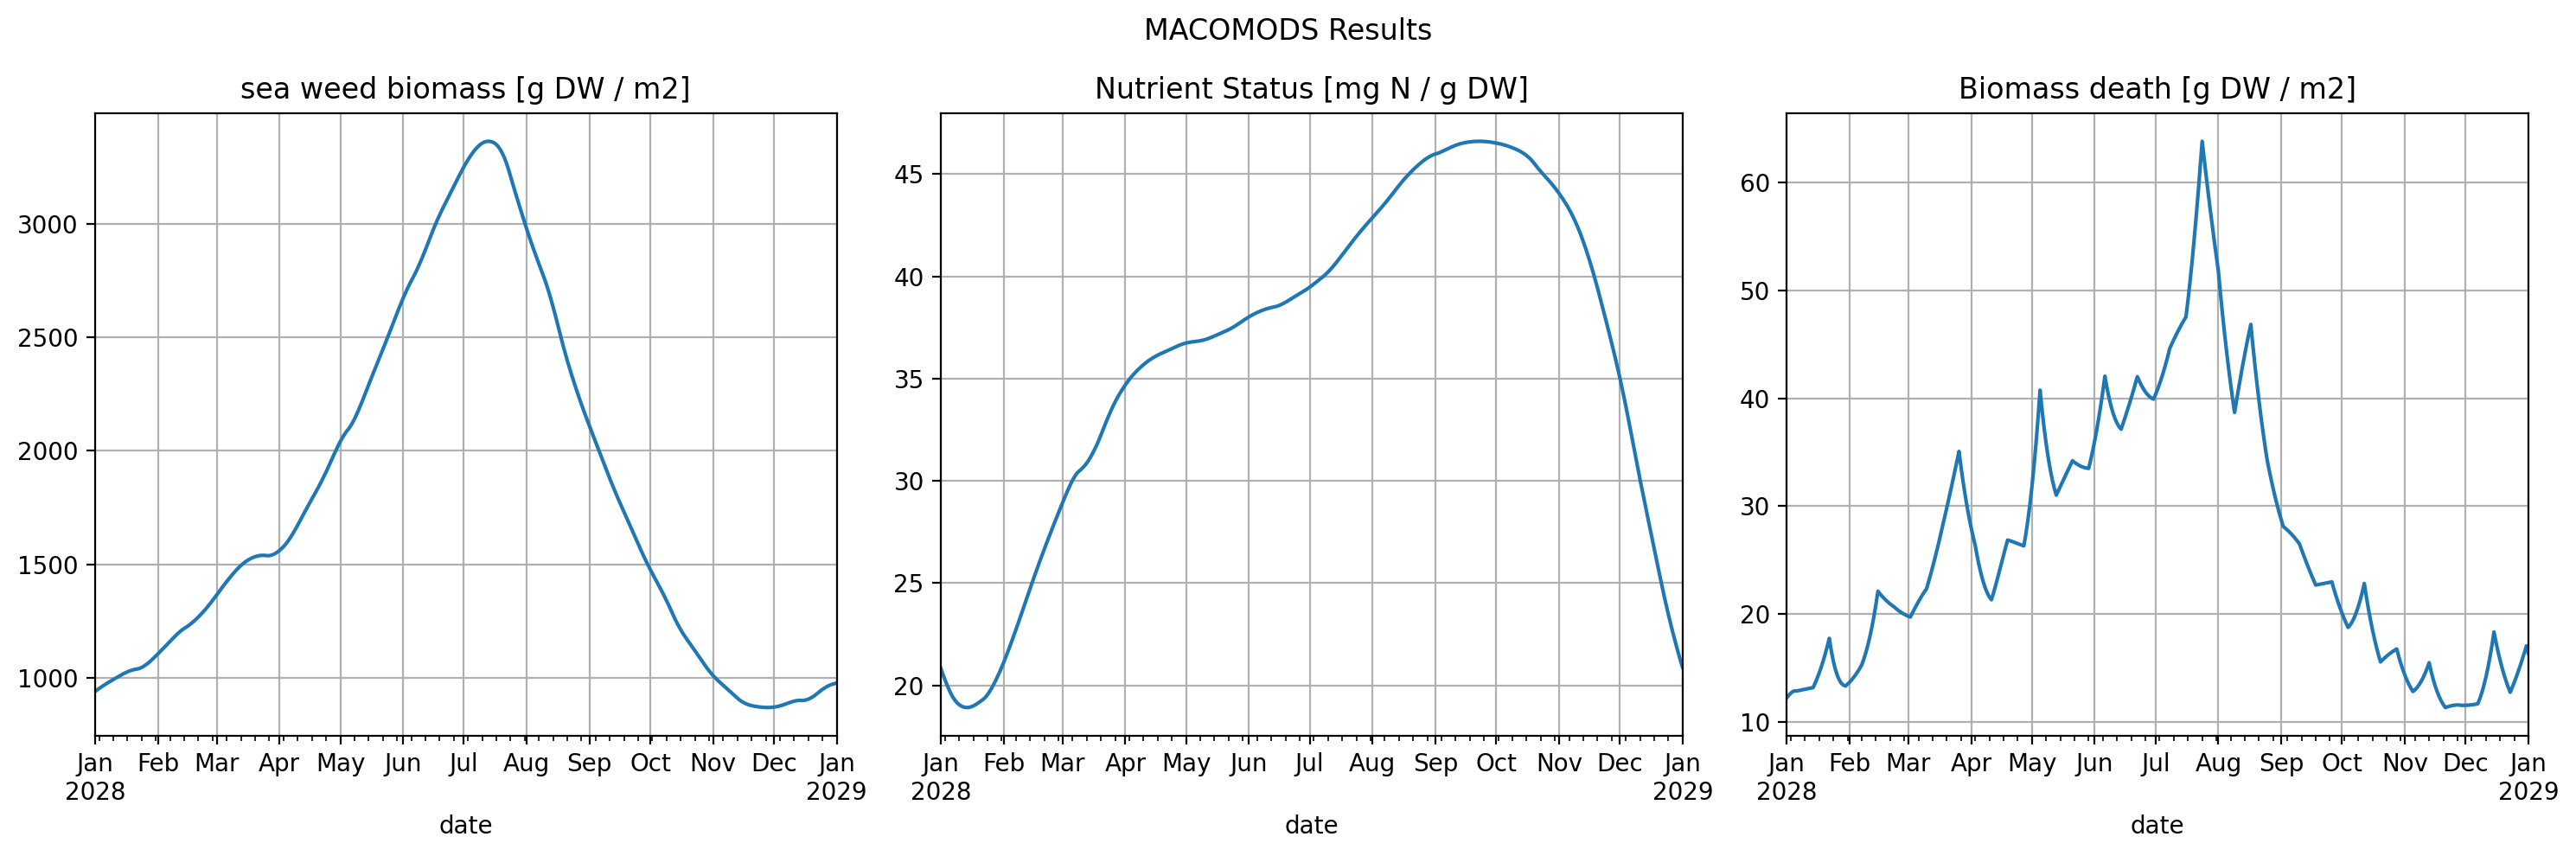

In [6]:
plot_macmods(macmods_cons_sst,start_date='2028-01-01',end_date='2029-01-01')

## Macmods with dSST=1K/yr

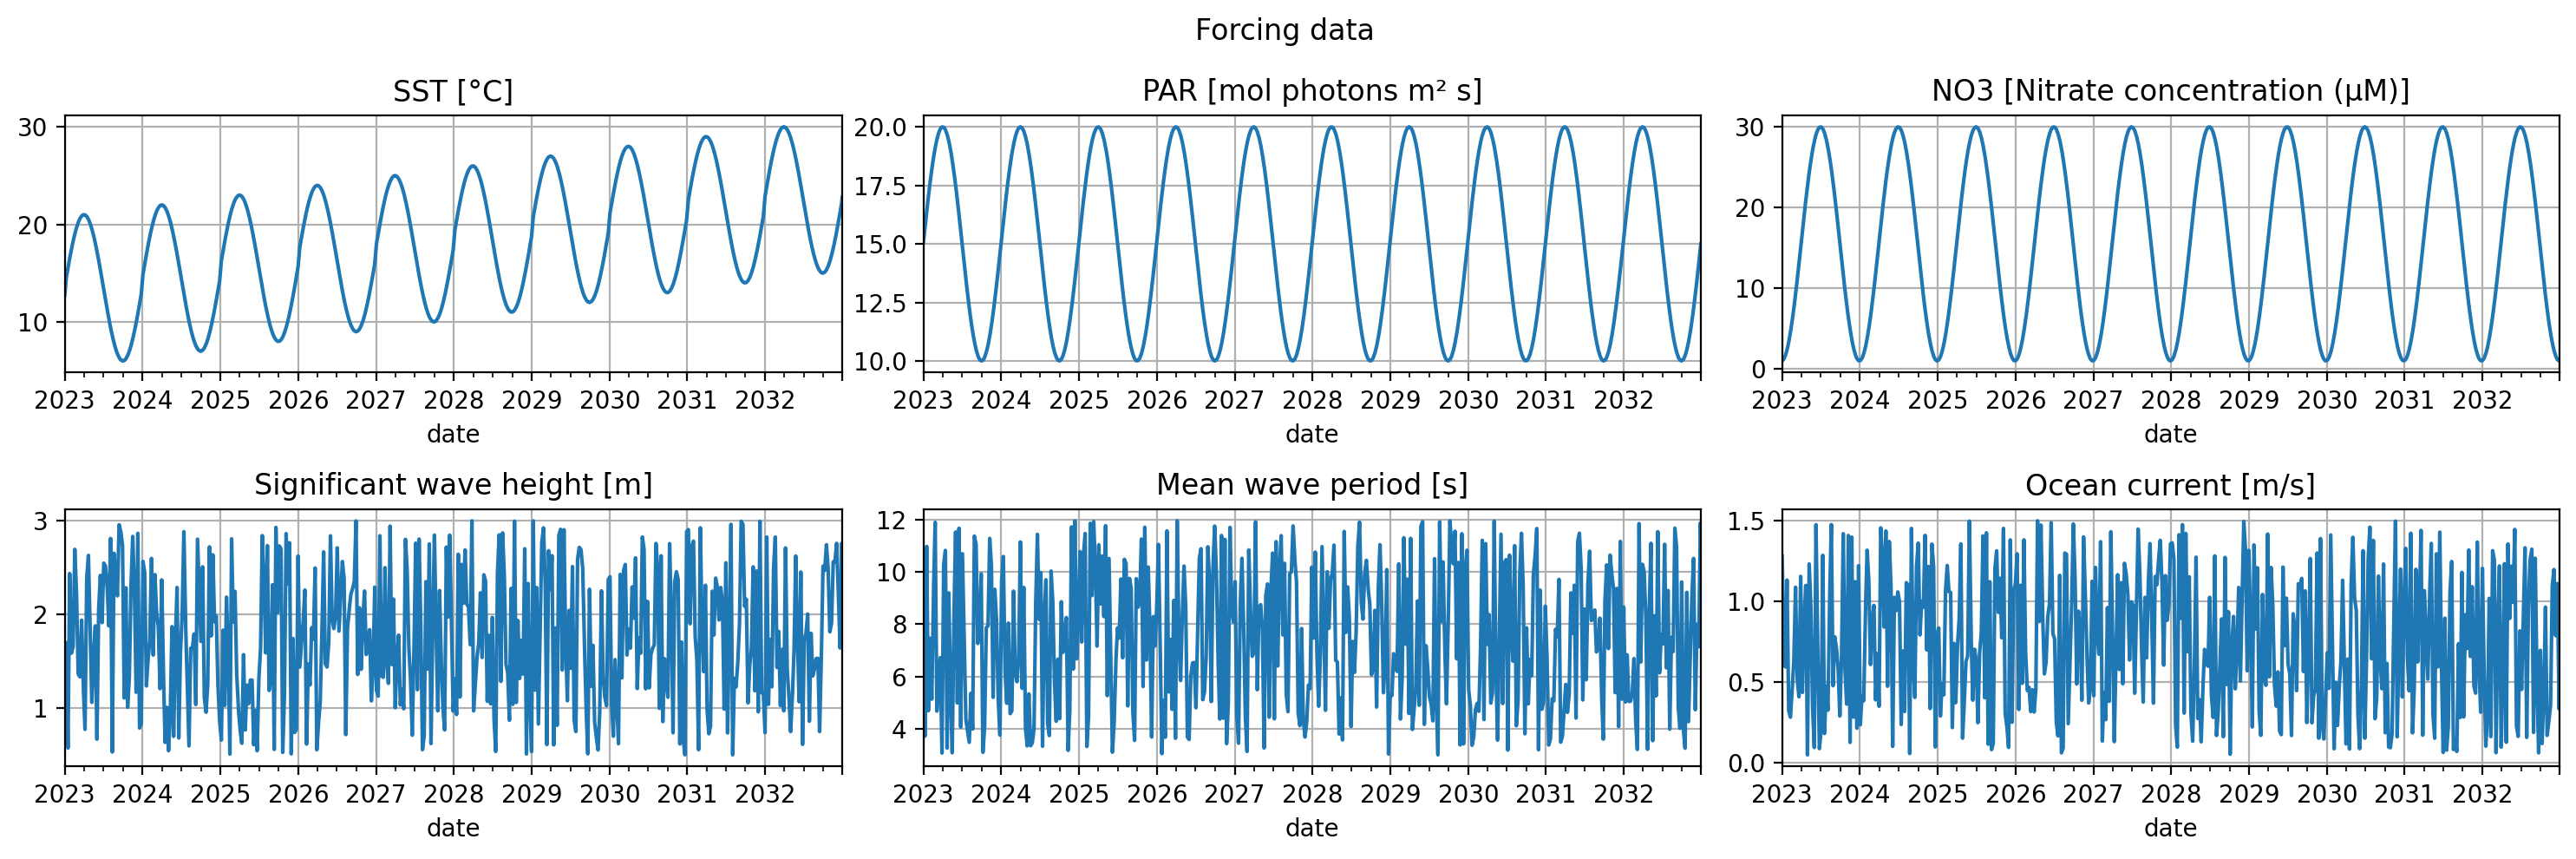

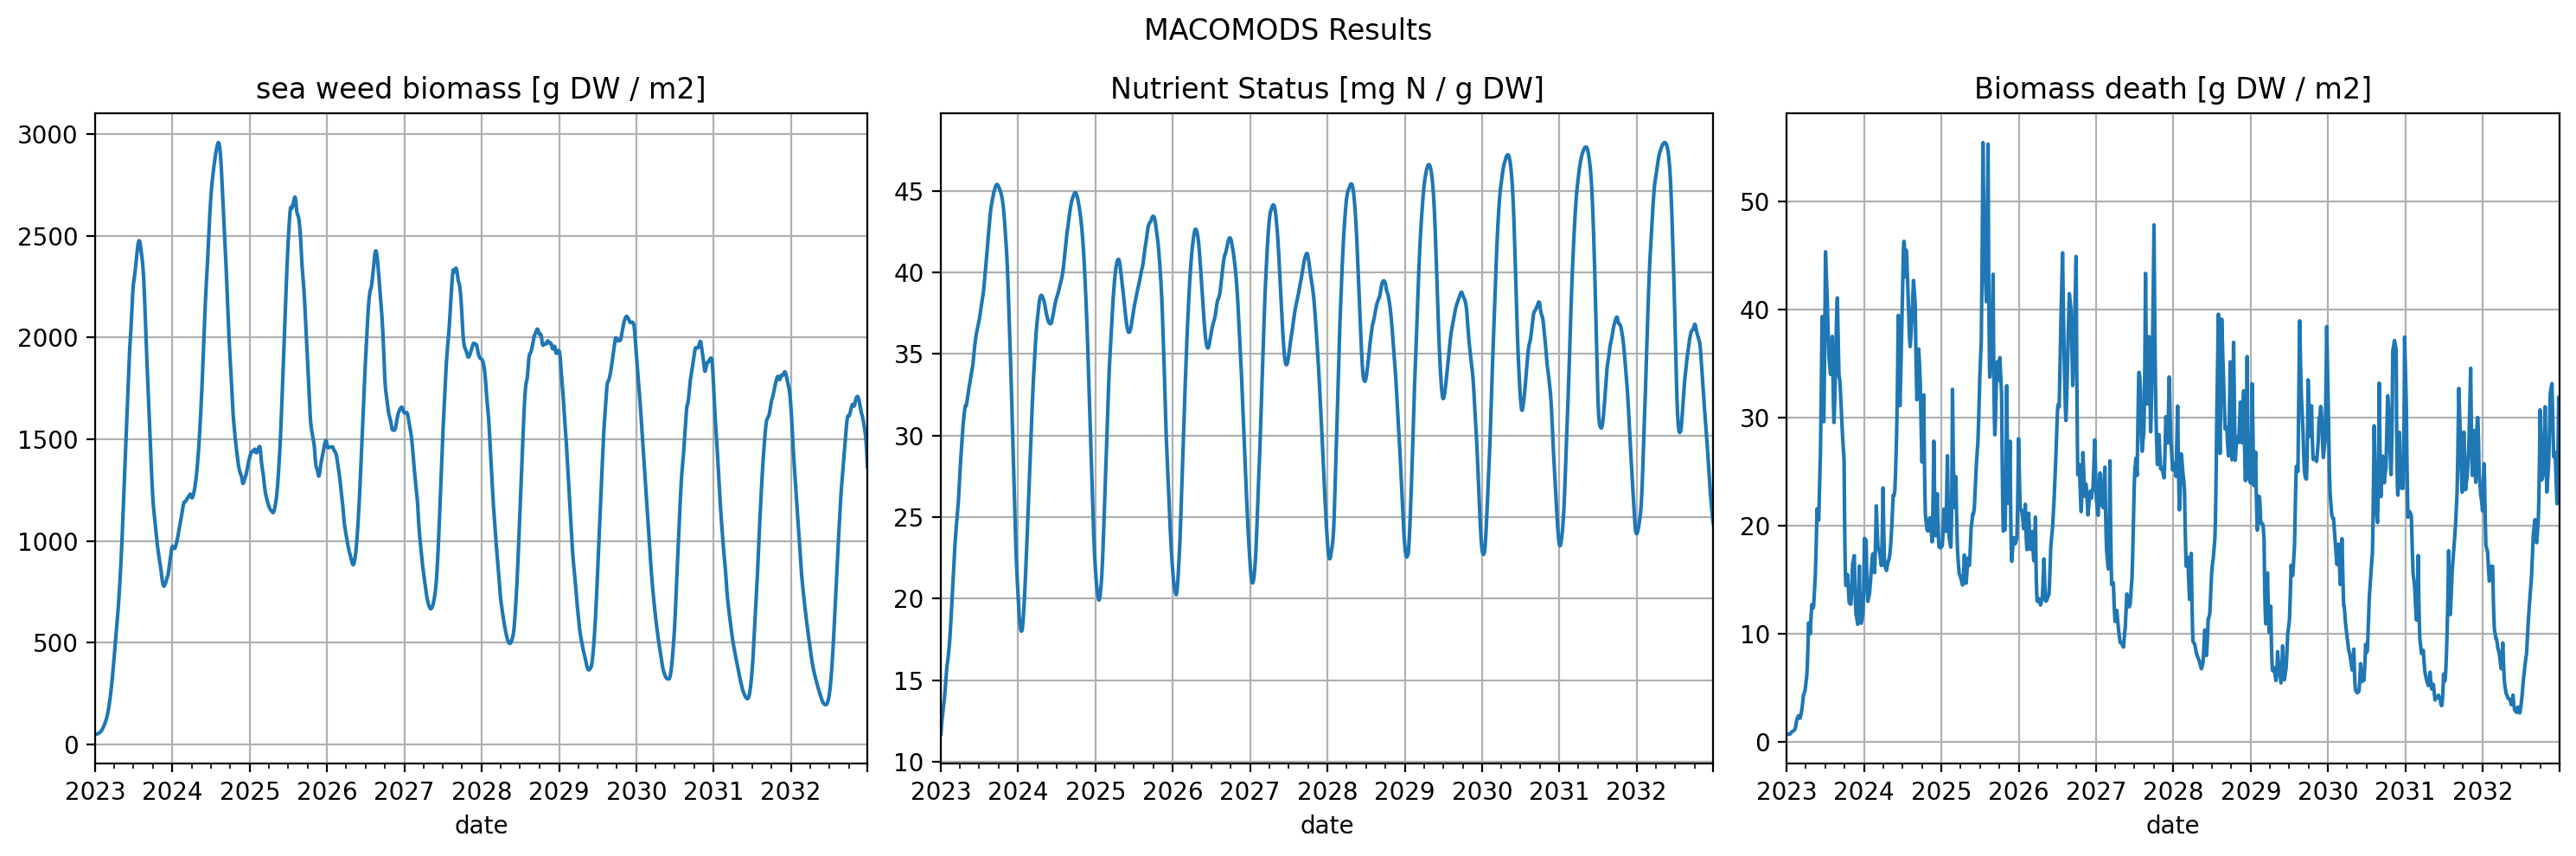

In [7]:
plot_macmods(macmods_dsst)